In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
plt.style.use('fivethirtyeight')

In [2]:
end = datetime.now()
start = datetime(end.year-15, end.month, end.day)
stock = 'BTC-USD'
stock_data = yf.download(stock, start=start, end = end)


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [3]:
stock_data.head()

Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,
2014-09-17,457.334015,468.174011,452.421997,465.864014,21056800
2014-09-18,424.440002,456.859985,413.104004,456.859985,34483200
2014-09-19,394.795990,427.834991,384.532013,424.102997,37919700
2014-09-20,408.903992,423.295990,389.882996,394.673004,36863600
2014-09-21,398.821014,412.425995,393.181000,408.084991,26580100


In [4]:
stock_data.tail()

Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,
2025-02-15,97580.351562,97975.039062,97240.195312,97508.382812,17047266288
2025-02-16,96175.031250,97725.593750,96060.976562,97580.492188,16536755396
2025-02-17,95773.382812,97032.234375,95243.546875,96179.007812,27336550690
2025-02-18,95539.546875,96695.375000,93388.835938,95773.812500,37325720482
2025-02-20,96532.937500,96649.710938,96487.429688,96628.398438,28454723584


In [5]:
stock_data.describe().T

,,count,mean,std,min,25%,50%,75%,max
Price,Ticker,,,,,,,,
Close,BTC-USD,3809.0,2.062751e+04,2.376787e+04,1.781030e+02,1.281080e+03,9.510200e+03,3.308623e+04,1.061463e+05
High,BTC-USD,3809.0,2.106249e+04,2.424765e+04,2.117310e+02,1.294830e+03,9.681648e+03,3.422207e+04,1.091149e+05
Low,BTC-USD,3809.0,2.012549e+04,2.321762e+04,1.715100e+02,1.265930e+03,9.300431e+03,3.149316e+04,1.052917e+05
Open,BTC-USD,3809.0,2.060385e+04,2.374101e+04,1.768970e+02,1.277430e+03,9.508313e+03,3.298576e+04,1.061473e+05
Volume,BTC-USD,3809.0,1.898801e+10,2.070886e+10,5.914570e+06,5.141870e+08,1.514001e+10,3.020000e+10,3.509679e+11


In [6]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3809 entries, 2014-09-17 to 2025-02-20
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Close, BTC-USD)   3809 non-null   float64
 1   (High, BTC-USD)    3809 non-null   float64
 2   (Low, BTC-USD)     3809 non-null   float64
 3   (Open, BTC-USD)    3809 non-null   float64
 4   (Volume, BTC-USD)  3809 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 178.5 KB


In [7]:
stock_data.columns

MultiIndex([( 'Close', 'BTC-USD'),
            (  'High', 'BTC-USD'),
            (   'Low', 'BTC-USD'),
            (  'Open', 'BTC-USD'),
            ('Volume', 'BTC-USD')],
           names=['Price', 'Ticker'])

In [8]:
#Close price data
closing_price = stock_data[['Close']]
closing_price

Price,Close
Ticker,BTC-USD
Date,
2014-09-17,457.334015
2014-09-18,424.440002
2014-09-19,394.795990
2014-09-20,408.903992
2014-09-21,398.821014
...,...
2025-02-15,97580.351562
2025-02-16,96175.031250


<function matplotlib.pyplot.show(close=None, block=None)>

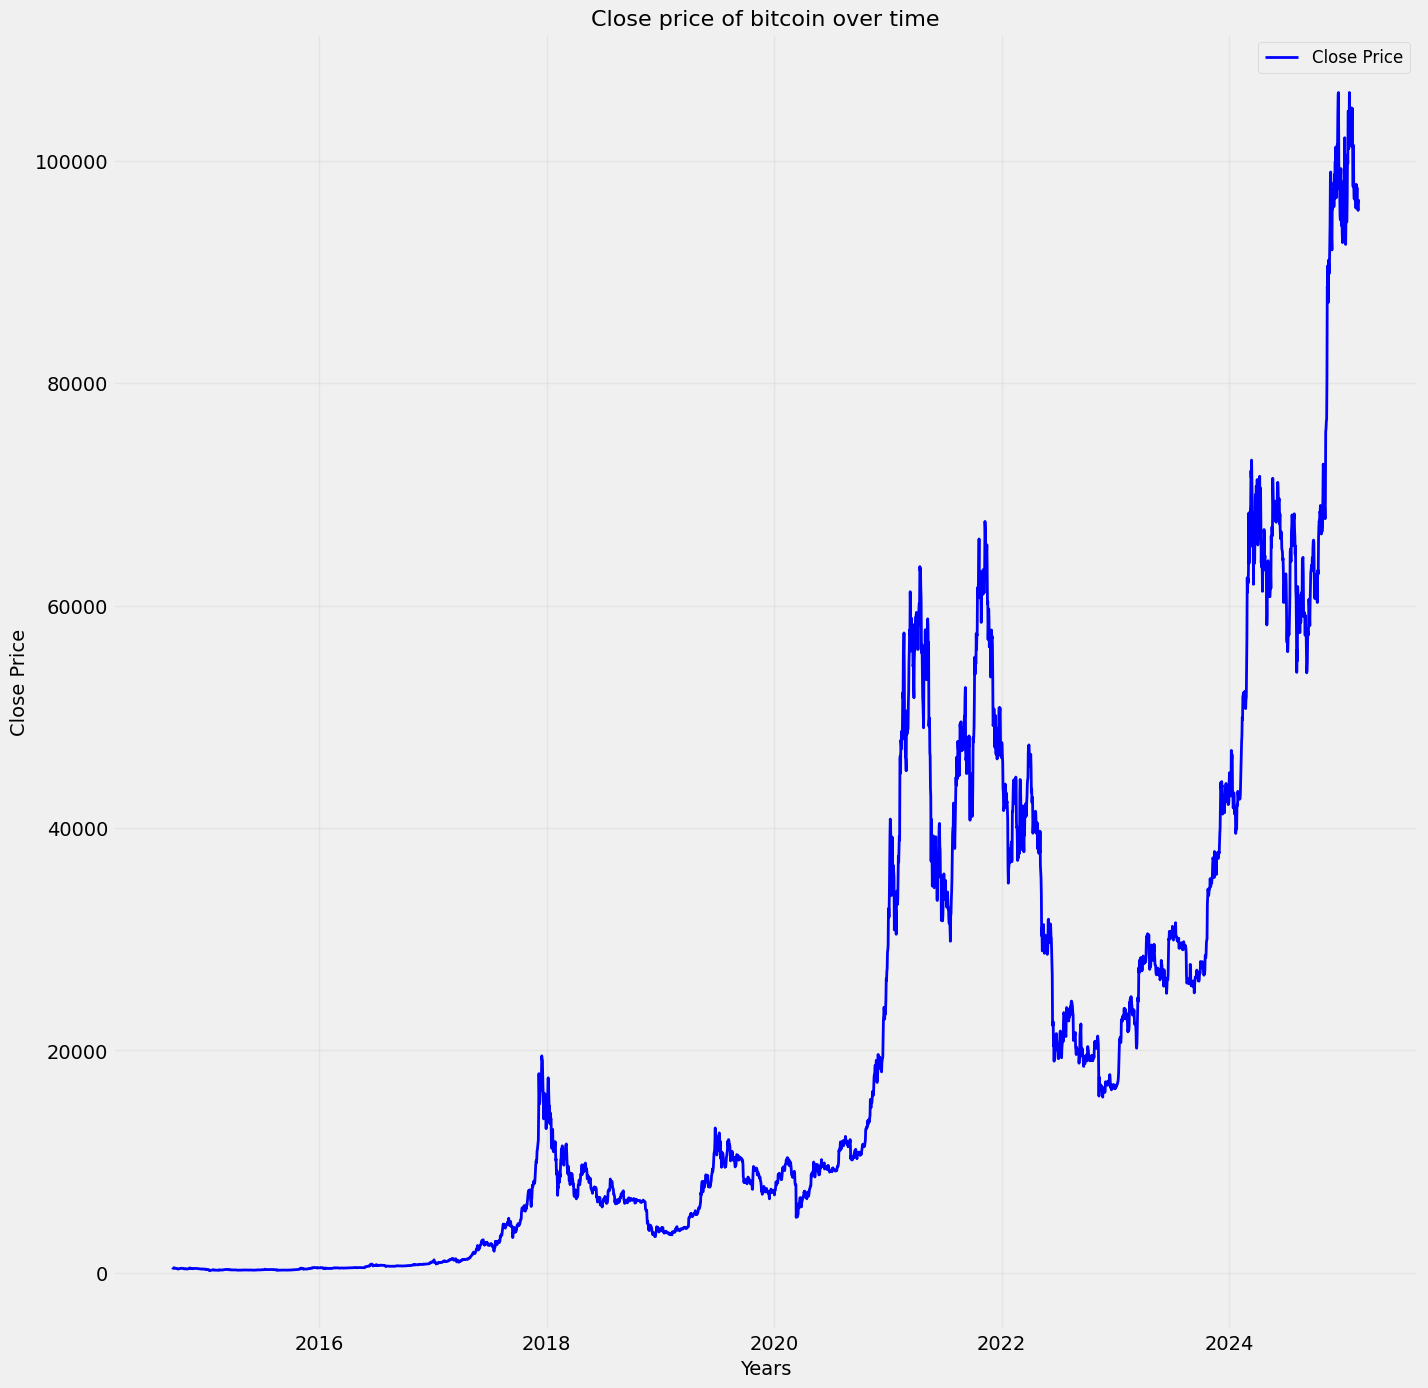

In [9]:
#plot closing price with enhancement
plt.figure(figsize = (15, 16))
plt.plot(closing_price.index, closing_price['Close'], label = 'Close Price', color = 'blue', linewidth = 2)
plt.title("Close price of bitcoin over time", fontsize = 16)
plt.xlabel("Years", fontsize = 14)
plt.ylabel('Close Price', fontsize = 14)
plt.grid(alpha = 0.3)
plt.legend(fontsize = 12)
plt.show

In [10]:
#Moving Average
for i in range(2014, 2025):
    print(i, list(stock_data.index.year).count(i))

2014 106
2015 365
2016 366
2017 365
2018 365
2019 365
2020 366
2021 365
2022 365
2023 365
2024 366


In [11]:
closing_price['MA_366'] = closing_price['Close'].rolling(window = 366).mean()
closing_price['MA_106'] = closing_price['Close'].rolling(window = 106).mean()

C:\Users\deepi\AppData\Local\Temp\ipykernel_16496\2850143019.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closing_price['MA_366'] = closing_price['Close'].rolling(window = 366).mean()
C:\Users\deepi\AppData\Local\Temp\ipykernel_16496\2850143019.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closing_price['MA_106'] = closing_price['Close'].rolling(window = 106).mean()


<function matplotlib.pyplot.show(close=None, block=None)>

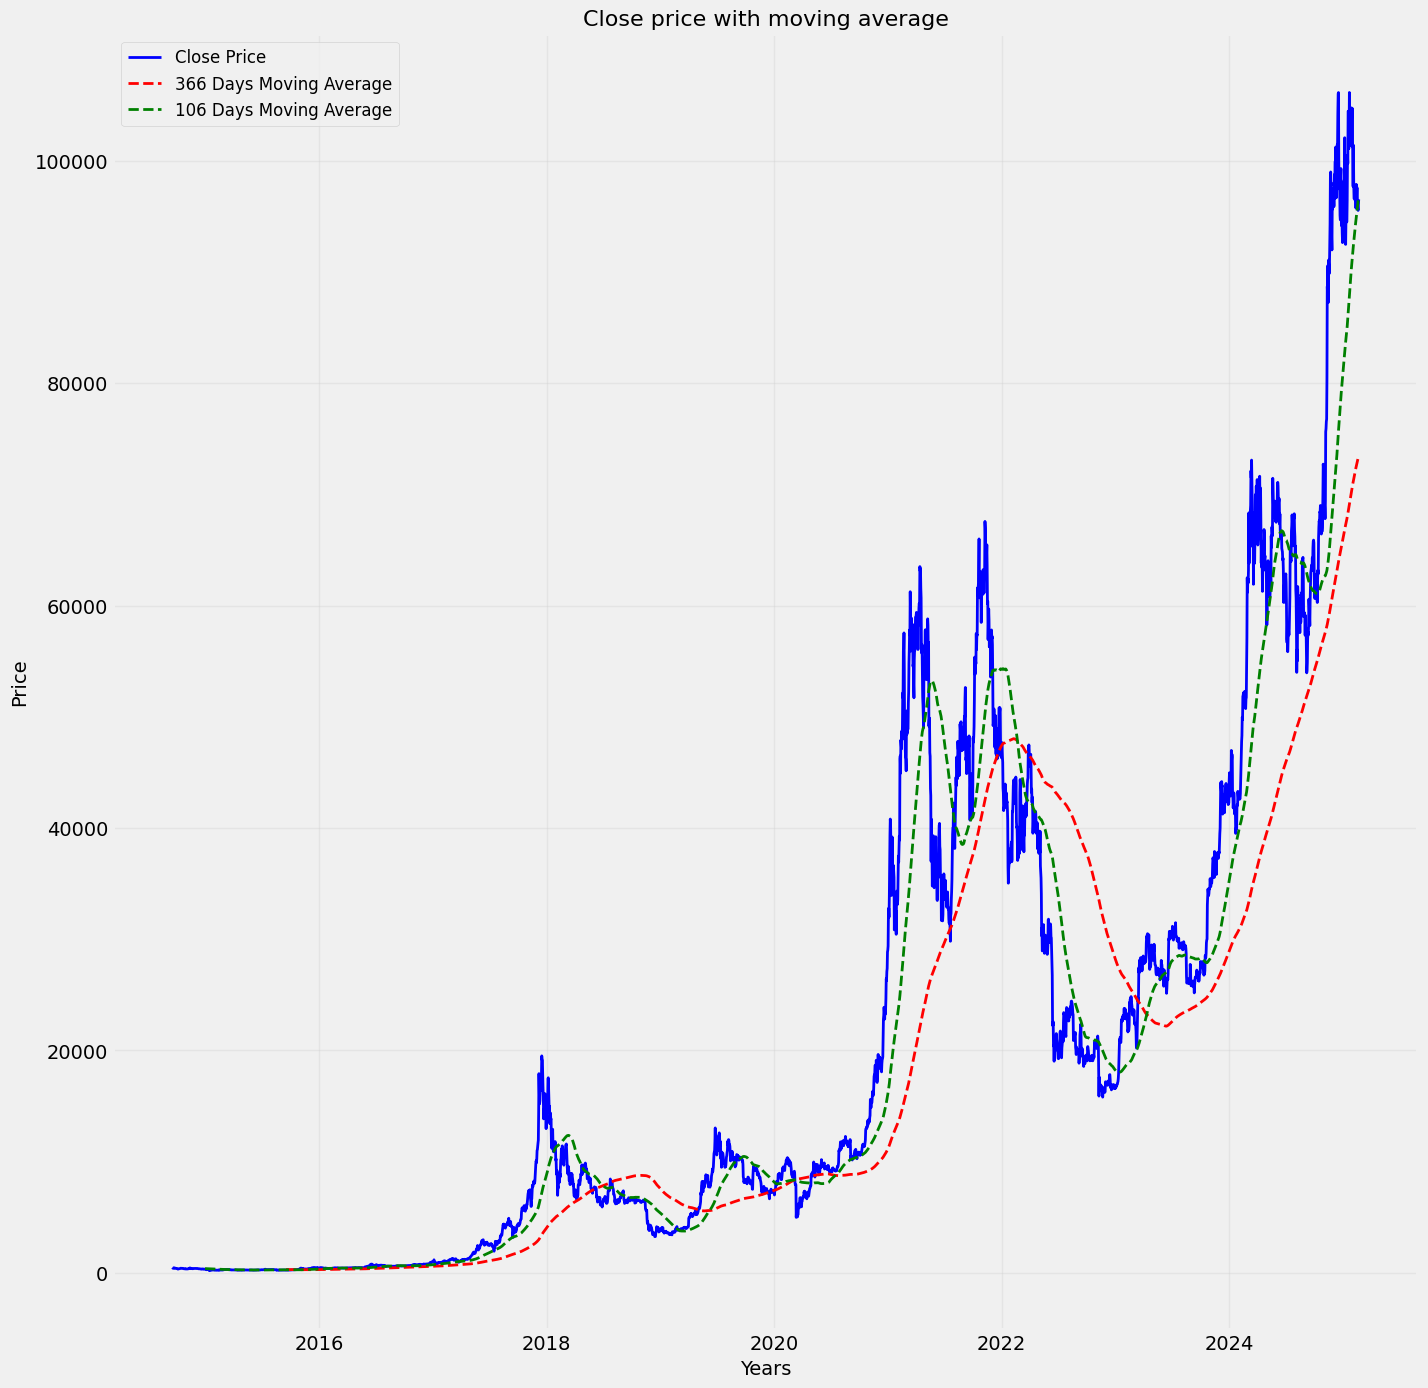

In [12]:
#plot closing price with enhancement
plt.figure(figsize = (15, 16))
plt.plot(closing_price.index, closing_price['Close'], label = 'Close Price', color = 'blue', linewidth = 2)
plt.plot(closing_price.index, closing_price['MA_366'], label = '366 Days Moving Average', color = 'red', linestyle = "--" ,linewidth = 2)
plt.plot(closing_price.index, closing_price['MA_106'], label = '106 Days Moving Average', color = 'green', linestyle = "--" , linewidth = 2)

plt.title("Close price with moving average", fontsize = 16)
plt.xlabel("Years", fontsize = 14)
plt.ylabel('Price', fontsize = 14)
plt.grid(alpha = 0.3)
plt.legend(fontsize = 12)
plt.show

In [13]:
#LSTM
#Scale the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(closing_price[['Close']].dropna())
scaled_data 

array([[0.00263505],
       [0.00232463],
       [0.00204489],
       ...,
       [0.90211321],
       [0.89990655],
       [0.90928098]])

In [14]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [15]:
#prepare data for LSTM
x_data = []
y_data = []
base_days = 100
for i in range(base_days, len(scaled_data)):
    x_data.append(scaled_data[i-base_days: i])
    y_data.append(scaled_data[i])
x_data = np.array(x_data)
y_data = np.array(y_data)
    

In [16]:
#Split into train and test sets
train_size = int(len(x_data) * 0.9)
x_train, y_train = x_data[:train_size], y_data[:train_size]
x_test, y_test = x_data[train_size:], y_data[train_size:]

In [17]:
model = Sequential([
    LSTM(128, return_sequences = True, input_shape = (x_train.shape[1], 1)),
    LSTM(64, return_sequences = False),
    Dense(25),
    Dense(1)
])
model.compile(optimizer = "adam", loss = "mean_squared_error")
model.summary()

c:\Users\deepi\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 128)       │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 117,619 (459.45 KB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
model.fit(x_train, y_train, batch_size = 5, epochs = 10)

Epoch 1/10
668/668 ━━━━━━━━━━━━━━━━━━━━ 25s 34ms/step - loss: 8.2203e-04
Epoch 2/10
668/668 ━━━━━━━━━━━━━━━━━━━━ 22s 33ms/step - loss: 1.9061e-04
Epoch 3/10
668/668 ━━━━━━━━━━━━━━━━━━━━ 23s 34ms/step - loss: 2.0704e-04
Epoch 4/10
668/668 ━━━━━━━━━━━━━━━━━━━━ 25s 37ms/step - loss: 1.3057e-04
Epoch 5/10
668/668 ━━━━━━━━━━━━━━━━━━━━ 25s 37ms/step - loss: 1.1358e-04
Epoch 6/10
668/668 ━━━━━━━━━━━━━━━━━━━━ 25s 38ms/step - loss: 1.1844e-04
Epoch 7/10
668/668 ━━━━━━━━━━━━━━━━━━━━ 30s 45ms/step - loss: 1.0583e-04
Epoch 8/10
668/668 ━━━━━━━━━━━━━━━━━━━━ 30s 46ms/step - loss: 1.0048e-04
Epoch 9/10
668/668 ━━━━━━━━━━━━━━━━━━━━ 31s 47ms/step - loss: 9.5445e-05
Epoch 10/10
668/668 ━━━━━━━━━━━━━━━━━━━━ 28s 42ms/step - loss: 1.4151e-04


In [19]:
predictions = model.predict(x_test)
inv_predictions = scaler.inverse_transform(predictions)
inv_y_test = scaler.inverse_transform(y_test)

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step


<function matplotlib.pyplot.show(close=None, block=None)>

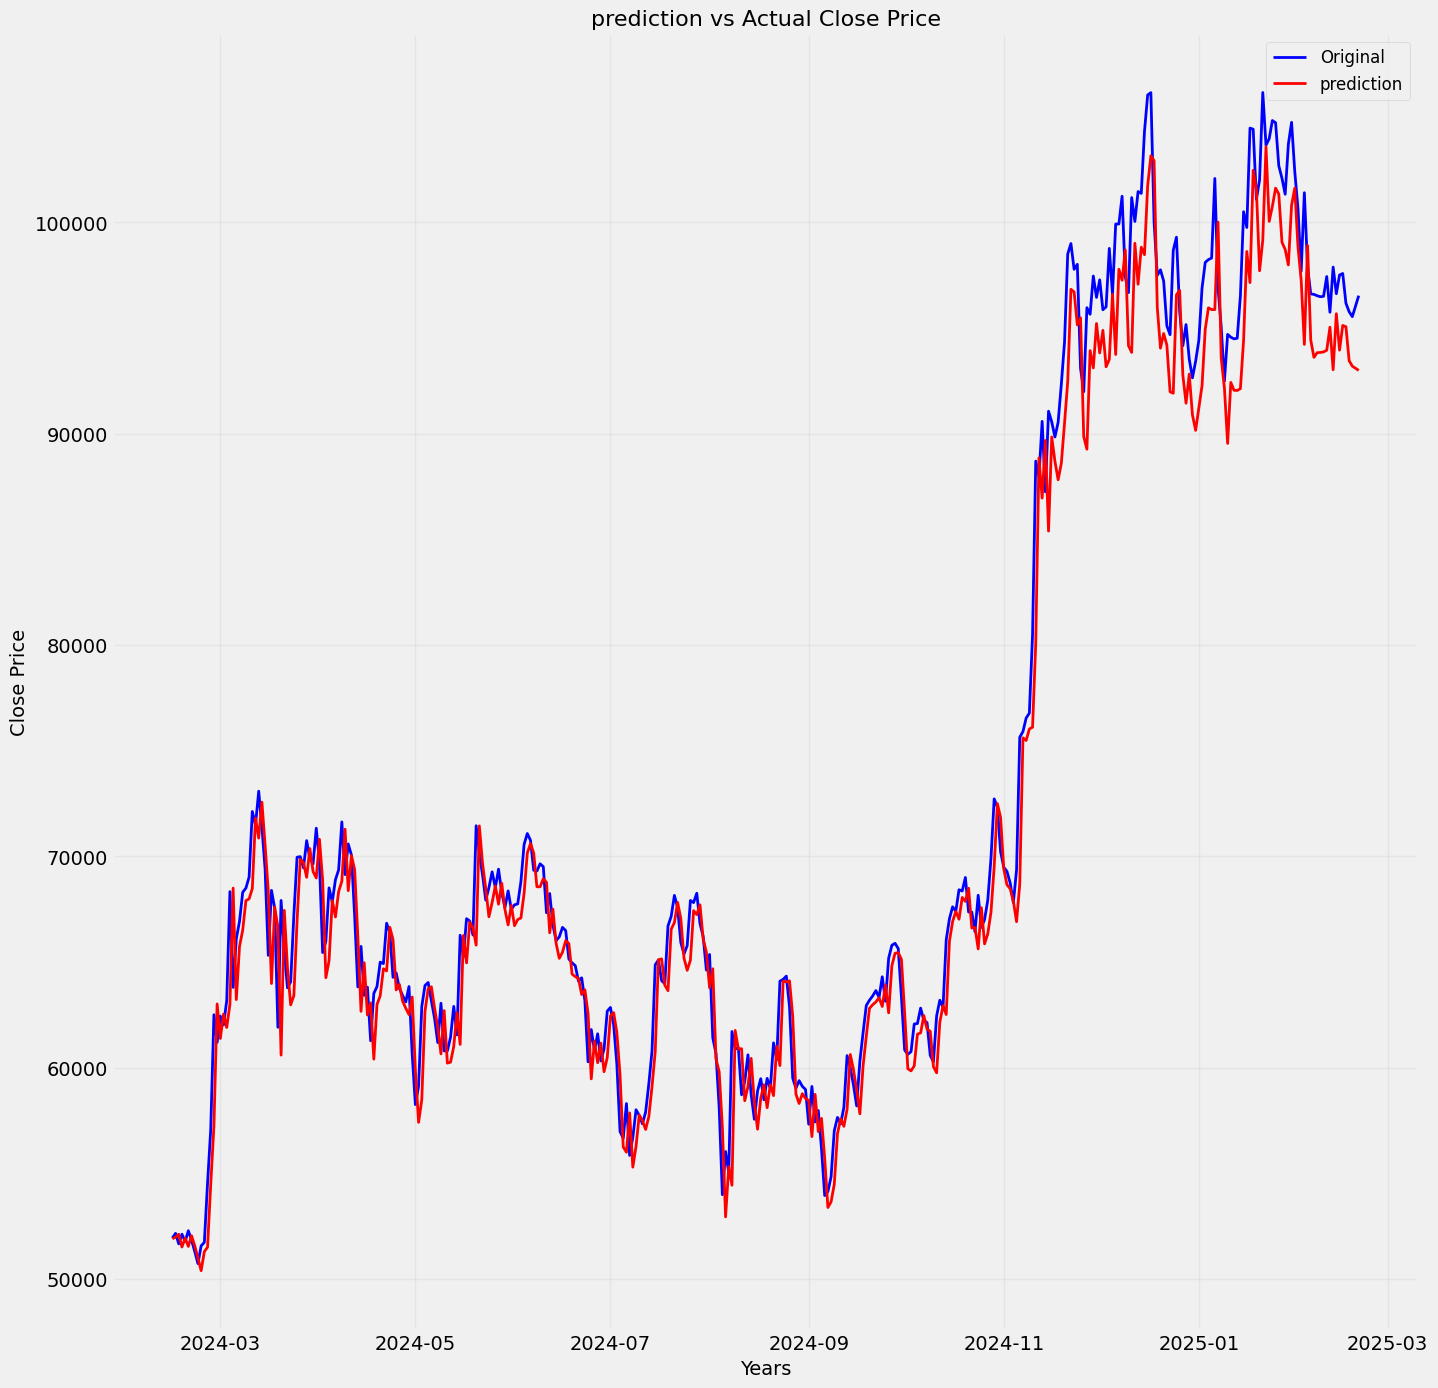

In [20]:
plotting_data = pd.DataFrame(
    {
        'Original': inv_y_test.flatten(),
        'Prediction': inv_predictions.flatten(),
    }, index = closing_price.index[train_size + base_days:]
)

plt.figure(figsize = (15, 16))
plt.plot(plotting_data.index, plotting_data['Original'], label = 'Original', color = 'blue', linewidth = 2)
plt.plot(plotting_data.index, plotting_data['Prediction'], label = 'prediction', color = 'red', linewidth = 2)

plt.title("prediction vs Actual Close Price", fontsize = 16)
plt.xlabel("Years", fontsize = 14)
plt.ylabel('Close Price', fontsize = 14)
plt.grid(alpha = 0.3)
plt.legend(fontsize = 12)
plt.show

In [21]:
#predict future days
last_100 = scaled_data[-100:].reshape(1, -1, 1)
future_predictions=[]
for _ in range(10):
    next_days = model.predict(last_100)
    future_predictions.append(scaler.inverse_transform(next_days))
    last_100 = np.append(last_100[:, 1:, :], next_days.reshape(1, 1, -1), axis = 1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


In [22]:
last_100

array([[[0.9325401 ],
        [0.9210236 ],
        [0.92325577],
        [0.87690672],
        [0.86636604],
        [0.90389817],
        [0.90097217],
        [0.91804385],
        [0.90848939],
        [0.91632886],
        [0.90298066],
        [0.90427218],
        [0.93037782],
        [0.90985316],
        [0.94125071],
        [0.94127548],
        [0.95366297],
        [0.91777203],
        [0.91062565],
        [0.9530686 ],
        [0.94240472],
        [0.95576966],
        [0.95495537],
        [0.98256485],
        [0.99890017],
        [0.99994655],
        [0.94239094],
        [0.91832158],
        [0.92082211],
        [0.91580925],
        [0.89580523],
        [0.89185409],
        [0.92950551],
        [0.93538559],
        [0.90232208],
        [0.88693391],
        [0.89636193],
        [0.88094501],
        [0.87257442],
        [0.87999167],
        [0.88933933],
        [0.91262101],
        [0.92413914],
        [0.92535457],
        [0.92609757],
        [0

In [23]:
future_predictions

[array([[94163.13]], dtype=float32),
 array([[91376.266]], dtype=float32),
 array([[88592.984]], dtype=float32),
 array([[85886.016]], dtype=float32),
 array([[83292.89]], dtype=float32),
 array([[80842.14]], dtype=float32),
 array([[78556.695]], dtype=float32),
 array([[76451.664]], dtype=float32),
 array([[74533.8]], dtype=float32),
 array([[72802.25]], dtype=float32)]

<function matplotlib.pyplot.show(close=None, block=None)>

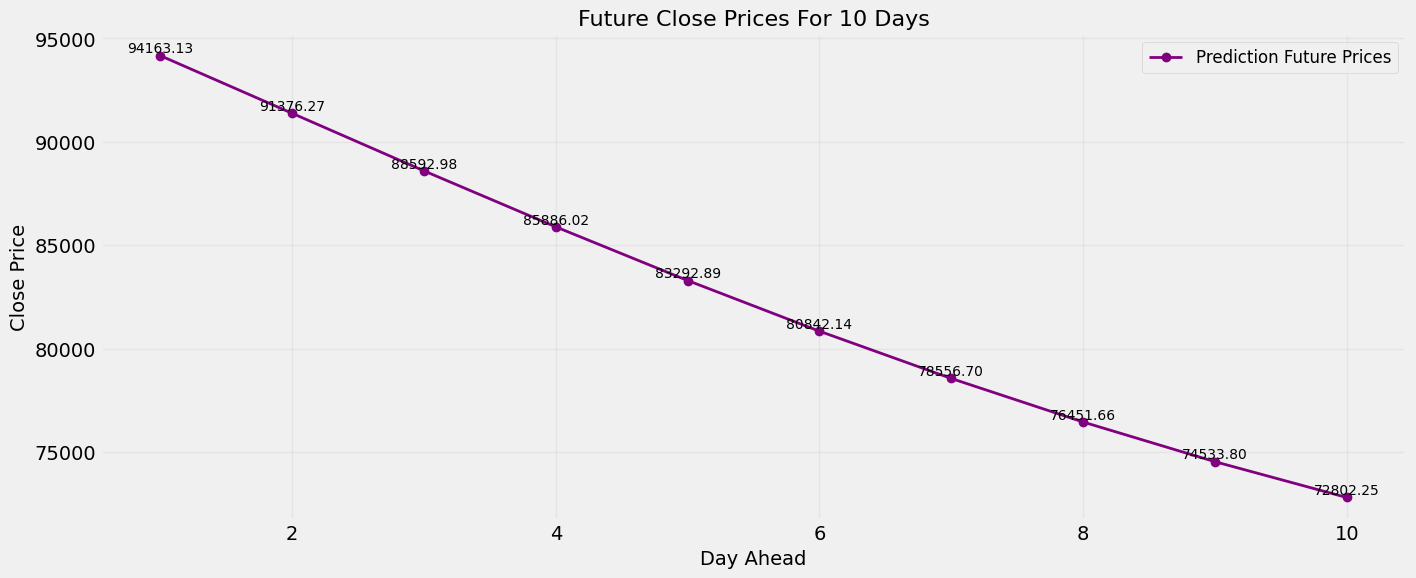

In [24]:
future_predictions = np.array(future_predictions).flatten()

plt.figure(figsize = (15, 6))
plt.plot(range(1, 11), future_predictions, marker="o", label = 'Prediction Future Prices', color = 'purple', linewidth = 2)

for i, val in enumerate(future_predictions):
    plt.text(i+1,val, f'{val:.2f}', fontsize = 10, ha = 'center', va = 'bottom', color = 'black')

plt.title("Future Close Prices For 10 Days", fontsize = 16)
plt.xlabel("Day Ahead", fontsize = 14)
plt.ylabel('Close Price', fontsize = 14)
plt.grid(alpha = 0.3)
plt.legend(fontsize = 12)
plt.show

In [26]:
model.save("model.keras")
